 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## Whiteboard

In [2]:
# Square(n) sum
# Create a function that given a list of integers squares each EVEN number 
# passed into it and then sums the results together.

# Example Input: [1, 2, 2]
# Example Output: 8
# Explanation: 2 is the only even # in the array so 2^2 = 4 + 2^2 = 4 = 8


# Example Input: [3, 4, 5, 8]
# Example Output: 80
# Explanation: 4 & 8 are even so 4^2 = 16 + 8^2 = 64 = 80

def even_sq_sum(lst):
    return sum([num**2 for num in lst if num%2 == 0])

print(even_sq_sum([1, 2, 2]))
print(even_sq_sum([3, 4, 5, 8]))

8
80


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [12]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'


In [11]:
class My_Video():
    def __init__(self, title, quality, duration, cast, genre, captioning):
        self.title = title
        self.quality = quality
        self.duration = duration
        self.cast = cast
        self.genre = genre
        self.captioning = captioning
        
    def change_video(self):
        new_show = input("What would you like to watch? ")
        self.title = new_show
        print(f"You are now watching {self.title}")
        
    def change_quality(self):
        while True:
            print("""
Available Video Qualities:
[1] 240p
[2] 480p
[3] 720p
[4] 1080p
[5] 4K
            """)
            new_quality = input("Select your video quality: ")
            if new_quality == '1':
                self.quality = '240p'
                print("Video quality is now 240p")
                break
            elif new_quality == '2':
                self.quality = '480p'
                print("Video quality is now 480p")
                break
            elif new_quality == '3':
                self.quality = '720p'
                print("Video quality is now 720p")
                break
            elif new_quality == '4':
                self.quality = '1080p'
                print("Video quality is now 1080p")
                break
            elif new_quality == '5':
                self.quality = '4k'
                print("Video quality is now 4K")
                break
            else:
                print("Invalid input. Please try again.")
        
        
new_vid = My_Video("Cool Video", "1080p", "90 min", ["Ryan", "Alex", "Nate", "Tenzin", "Kayla", "John"], "Spooky", True)
        
new_vid.change_quality()



Available Video Qualities:
[1] 240p
[2] 480p
[3] 720p
[4] 1080p
[5] 4K
            
Select your video quality: 5
Video quality is now 4K


In [65]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'

In [66]:
# attributes from instances are unique to that instance
# attributes are "protected" and only to be accessed by calss methods

class Video():
    def __init__(self):
        self.title = None
        self.length = timedelta()
        self.link = generic_image
    
    def play(self):
        print(f"Now playing {self.title}")
        display(Image(self.link))
        
    def __repr__(self):
        return f"{self.title} is {self.length.seconds} seconds long."

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user. We have a bit to do before this becomes visible. But you've seen it before with presenting the user with the option to enter inputs. We then take those input and do something with them.
<br><br>


In [67]:
class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.date_aired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image

## 3 INHERITANCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [118]:
class Series():
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
        
    def get_info(self, query = ""):
        data = None #<-- in case we cant find the show we are looking for
        while not data:
            if not query:
                query = input("What is the name of the series? ")
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                    # print(data)
                else:
                    print(f"Series error: status code {r.status_code}")
                    query = ""
            else:
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                else:
                    print(f"Series error: status code {r.status_code}")
                    
        # use data to build out our attributes
        self.id = data['id']
        self.title = data['name']
        self.summary = data['summary']
        self.genres = [genre for genre in data['genres']]
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
            
        # api call for episodes
        r = requests.get(f"https://api.tvmaze.com/shows/{self.id}/episodes")
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode error: status code {r.status_code}")
            
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        print(f"{self.title} has {len(self.episodes)} episodes")
        
    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? y/n ")
                if watching.lower().strip() not in ('yes', 'y'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
            
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return self.title

In [55]:
first_show = Series()
first_show.get_info('bleach')

Bleach has 379 episodes


Now playing The Day I Became a Shinigami


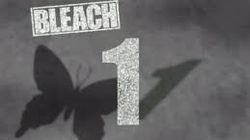

Now playing A Shinigami's Work


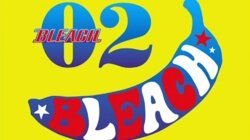

Now playing The Older Brother's Wish, the Younger Sister's Wish


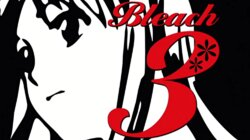

Are you still watching? y/n y
Now playing Cursed Parakeet


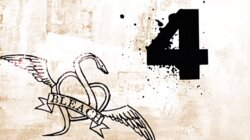

Now playing Beat the Invisible Enemy!


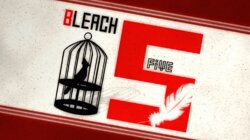

Now playing Fight to the death! Ichigo vs. Ichigo


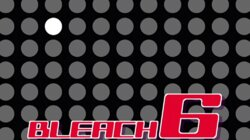

Are you still watching? y/n n


In [56]:
first_show.watch()

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


In [102]:
class Theater():
    def __init__(self):
        self.users = []
        self.watch_list = []
        self.current_user = None
        
    def add_user(self, name = ""):
        if not name:
            name = input("What is the name of the new user? ")
        self.users.append(name.title())
        self.choose_user()
        
    def choose_user(self):
        while True:
            print("Users:")
            for user in self.users:
                print(user)
            current = input("Choose a user: ")
            if current.title() in self.users:
                self.current_user = current
                break
            else:
                print(f"{current} is not a valid user")
                
    def add_to_watch_list(self, query = ''):
        show = Series()
        show.get_info(query)
        
        self.watch_list.append(show)
        
        print(f"{show.title} has been added to the watchlist!")
        
    def choose_from_watch_list(self):
        for series in self.watch_list:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n {series.summary}")
            display(Image(series.episodes[0].link))
        
        watch = input("What would you like to watch? ")
        #if watch.lower() in list(map(lambda x: x.title.lower(), self.watch_list)):
        for series in self.watch_list:
            if series.title.lower() == watch.lower().strip():
                series.watch()
                break
        else:
            response = input(f"{watch} is not in your watch list. Would you like to add it? (y,n) ")
            if response.lower().strip() in ('yes','y'):
                self.add_to_watch_list(watch)
                
                print("..........")
                sleep(2)
                print("..........")
                self.watch_list[-1].watch()
                
    def run(self):
        """
        method allowing users to choose a series and play episodes
        """
        
        display(Image(generic_image))
        
        if self.users:
            self.choose_user()
        else:
            name = input("Create a profile: ")
            self.add_user(name)
            self.current_user = name
            
            print("""
            Options:
            Search - Search for shows
            Watch - Pick something from your watchlist
            Add - Add a new user
            Quit - Close the application
            """)
        
        while True:
            response = input("What would you like to do? (search, watch, add, quit) ")
            
            if response.lower() == "search":
                self.add_to_watch_list()
            elif response.lower() == "watch":
                self.choose_from_watch_list()
            elif response.lower() == "add":
                self.add_user()
            elif response.lower() == 'quit':
                print(f"Thanks for watching! {self.current_user}!")
                break
            else:
                print("Invalid input.")

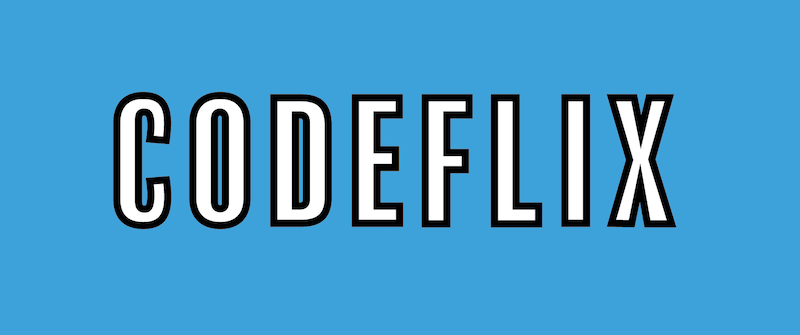

Create a profile: j
Users:
J
Choose a user: j

            Options:
            Search - Search for shows
            Watch - Pick something from your watchlist
            Add - Add a new user
            Quit - Close the application
            
What would you like to do? (search, watch, add, quit) search
What is the name of the series? bleach
Bleach has 379 episodes
Bleach has been added to the watchlist!
What would you like to do? (search, watch, add, quit) search
What is the name of the series? bleach
Bleach has 379 episodes
Bleach has been added to the watchlist!
What would you like to do? (search, watch, add, quit) watch


Title: Bleach | Episodes: 379

Summary: 
 <p>Ichigo Kurosaki is a teenager gifted with the ability to see spirits. His life is drastically changed by the sudden appearance of a Soul Reaper—one who governs the flow of souls between the human world and the afterlife—named Rukia Kuchiki, who arrives in search of a Hollow, a dangerous lost soul. When Rukia is seve

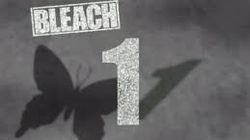



Title: Bleach | Episodes: 379

Summary: 
 <p>Ichigo Kurosaki is a teenager gifted with the ability to see spirits. His life is drastically changed by the sudden appearance of a Soul Reaper—one who governs the flow of souls between the human world and the afterlife—named Rukia Kuchiki, who arrives in search of a Hollow, a dangerous lost soul. When Rukia is severely wounded defending Ichigo from the Hollow, she attempts to transfer half of her reiatsu energy to Ichigo so that he can defeat the Hollow. However, Ichigo takes almost all of her energy, transforming into a Soul Reaper and allowing him to defeat the Hollow with ease. With her powers diminished, Rukia is left stranded in the human world until she can recover her strength. In the meantime, Ichigo must take over Rukia's role as a Soul Reaper, battling Hollows and guiding souls to the afterlife realm known as the Soul Society.</p>


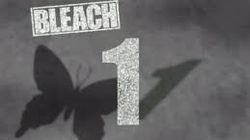

KeyboardInterrupt: Interrupted by user

In [103]:
codeflix = Theater()
codeflix.run()

##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...

## Update: Version 1.1

<p>Added get_cast method to do a get request on Cast API to pull info about a show's cast members</p>

In [168]:
class Series():
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
        self.casts = []
        
    # used to retrieve cast info for a series. get_info() must be ran first to get show id
    def get_cast(self):
        r = requests.get(f"https://api.tvmaze.com/shows/{self.id}/cast")
        if r.status_code == 200:
            self.casts = r.json()
        else:
            print(f"Unable to retrieve casts of {self.title.title()}. Double check you spelling and try again.")
            
    def get_info(self, query = ""):
        data = None #<-- in case we cant find the show we are looking for
        while not data:
            if not query:
                query = input("What is the name of the series? ")
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                    # print(data)
                else:
                    print(f"Series error: status code {r.status_code}")
                    query = ""
            else:
                r = requests.get(f'https://api.tvmaze.com/singlesearch/shows?q={query}')
                if r.status_code == 200:
                    data = r.json()
                else:
                    print(f"Series error: status code {r.status_code}")
                    
        # use data to build out our attributes
        self.id = data['id']
        self.title = data['name']
        self.summary = data['summary']
        self.genres = [genre for genre in data['genres']]
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
            
        # api call for episodes
        r = requests.get(f"https://api.tvmaze.com/shows/{self.id}/episodes")
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode error: status code {r.status_code}")
            
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        print(f"{self.title} has {len(self.episodes)} episodes")
        
    def watch(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? y/n ")
                if watching.lower().strip() not in ('yes', 'y'):
                    break
            self.episodes[i].play()
            sleep(self.episodes[i].length.seconds/1000)
            
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return self.title

## Update: Theater 2.0
<ul>
    <li>Changed watch_list attribute from list to dictionary so each users will have unique watchlists</li>
    <li>Remove duplicates in watchlist</li>
    <li>Changed main menu interface</li>
    <li>User can now change users from the main menu. New user can be created in the change users menu</li>
    <li>Added cast info section where user can look up a show's cast and get their info</li>
</ul>

In [217]:
class Theater():
    def __init__(self):
        self.users = []
        self.watch_list = {}
        self.current_user = None
        
    def add_user(self, name = ""):
        if not name:
            name = input("What is the name of the new user? ")
        self.users.append(name.title())
        self.watch_list[name] = []
        
    def choose_user(self):
        while True:
            print("Users:")
            for user in self.users:
                print(user.title())
                
            print("\n*Input a 'new' to create a new user*\n")
            
            current = input(f"Choose a user: ")
            if current.title() in self.users:
                self.current_user = current
                break
            elif current.lower().strip() in ('n','new'):
                self.add_user()
            else:
                print(f"{current.title()} is not an user. If you want add a new user, type 'new'")
                
    
    # each user will have their own watchlist
    def add_to_watch_list(self, user, query = ''):
        show = Series()
        show.get_info(query)
        
        # check if the show is already in the current user's wacthlist
        if show.title.lower() not in [obj.title.lower() for obj in self.watch_list[user]]:
            self.watch_list[user].append(show)  
            print(f"{show.title} has been added to your watchlist!")
        else:
            print(f"Oh! Looks like {show.title} is already in your watchlist!")
        
    def choose_from_watch_list(self, user):
        for series in self.watch_list[user]:
            print(f"\n\n{series} | Episodes: {len(series)}")
            print(f"\nSummary: \n {series.summary}")
            display(Image(series.episodes[0].link))
        
        watch = input("What would you like to watch? ('q' to return to main menu) ")
        
        if watch.lower() in ('q','quit','return','r'):
            return

        for series in self.watch_list[user]:
            if series.title.lower() == watch.lower().strip():
                series.watch()
                break
        
        else:
            response = input(f"{watch} is not in your watch list. Would you like to add it? (y,n) ")
            if response.lower().strip() in ('yes','y'):
                self.add_to_watch_list(user, watch)
                
                print("..........")
                sleep(2)
                print("..........")
                self.watch_list[user][-1].watch()
                
    # neatly print out the cast of a show
    def pretty_print(self, show):
        max_len = len(sorted([x['person']['name'] for x in show.casts], key=len)[-1])
        lst = show.casts.copy()
        for i in lst:
            if len(i['person']['name']) < max_len:
                for j in range(max_len - len(i['person']['name'])):
                    i['person']['name'] += " "
            
        print(f"\nCast of {show.title}:")
        for cast in lst:
            print(f"{cast['person']['name']}: {cast['character']['name']}")
                
    # user can see the cast of a show and the character(s) they play
    def cast_info(self):
        show = Series()
        show.get_info()
        show.get_cast()
        
        self.pretty_print(show)
        
        while True:
            response = input("Input actor's name to view more infomation.\n('q' to return to main menu or 'v' to view the cast list again.)\n")
            
            if response.strip().lower() in ('q','quit', 'r', 'return'):
                break
            elif response.strip().lower() in ('v','view'):
                self.pretty_print(show)
            
            # needs to keep looping till the end because actors can play multiple characters
            # example: Matt Stone and Trey Parker in South Park
            for cast in show.casts:
                if cast['person']['name'].strip() == response.strip().title():
                    display(Image(cast['person']['image']['medium']))
                    print(cast['person']['name'])
                    print("DOB:", cast['person']['birthday'])
                    print("From:", cast['person']['country']['name'])
                    print(f"\n{cast['person']['name'].strip()} plays {cast['character']['name']} on {show.title}.")
                    display(Image(cast['character']['image']['medium']))
              
            # had to comment this out because this always ran even if the user's input was found in the cast list
            # so if a user has an invalid inp
#             else:
#                 print(f"{response} is not one of the cast members. Please double check your spelling and try again.")

                
    def run(self):
        """
        method allowing users to choose a series and play episodes
        """
        
        display(Image(generic_image))
        
        if self.users:
            self.choose_user()
        else:
            name = input("Create a profile: ")
            self.add_user(name)
            self.current_user = name
        
        while True:
            print(f"\nCurrent User: {self.current_user.title()}")
            print("""
Options:
[1] - Add new shows to your watchlist
[2] - Watch something from your watchlist
[3] - Look up the cast for a show
[4] - Switch/Add User
[5] - Close the application
            """)
            response = input("What would you like to do? ")
            
            if response == "1":
                self.add_to_watch_list(self.current_user)
            elif response == "2":
                self.choose_from_watch_list(self.current_user)
            elif response == "3":
                self.cast_info()
            elif response == "4":
                self.choose_user()
            elif response == '5':
                print(f"Thanks for watching {self.current_user.title()}!")
                break
            else:
                print("Invalid input.")

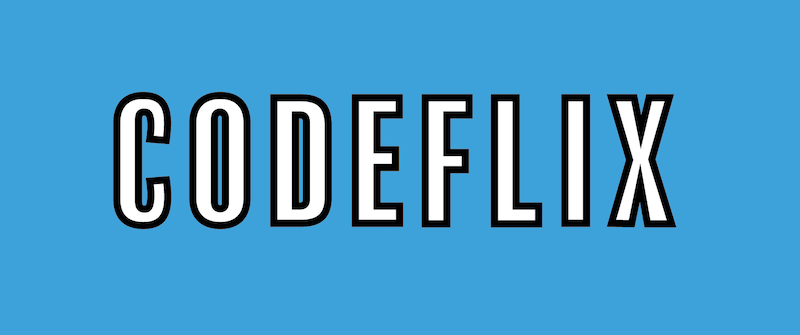

Create a profile: jeong

Current User: Jeong

Options:
[1] - Add new shows to your watchlist
[2] - Watch something from your watchlist
[3] - Look up the cast for a show
[4] - Switch/Add User
[5] - Close the application
            
What would you like to do? 3
What is the name of the series? south park
South Park has 313 episodes

Cast of South Park:
Matt Stone : Kyle Broflovski
Trey Parker: Eric Theodore Cartman
Trey Parker: Stan Marsh
Matt Stone : Kenny McKormick
Input actor's name to view more infomation.
('q' to return to main menu or 'v' to view the cast list again.)
matt stone


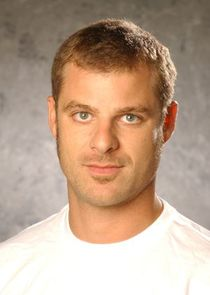

Matt Stone 
DOB: 1971-05-26
From: United States

Matt Stone plays Kyle Broflovski on South Park.


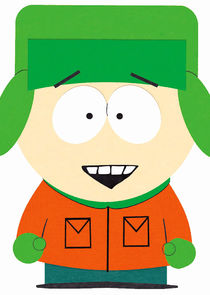

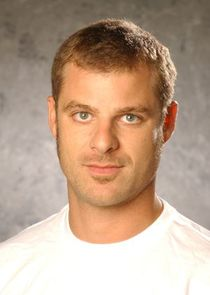

Matt Stone 
DOB: 1971-05-26
From: United States

Matt Stone plays Kenny McKormick on South Park.


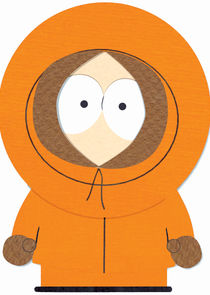

matt stone is not one of the cast members. Please double check your spelling and try again.


In [ ]:
codeflix = Theater()
codeflix.run()